# Sélection des zones Z05 avec **R**

## 1) Répertoire de travail et installation du package *foreign*

La table de correspondance entre identifiant des zones z05 et numéros de cantons est contenue dans le fichier **z05.dbf** (table d'attribut de la couche **z05.shp**). Pour lire ce fichier, il faut installer le package `foreign`, puis charger cette librairie à l'aide de la commande `library()`

In [1]:
install.packages('foreign', repos='http://cran.us.r-project.org')
# Une fois la librairie installée, vous pouvez commenter cette cellule de code

Installing package into 'C:/Users/rbubloz/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'foreign' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rbubloz\AppData\Local\Temp\RtmpqcW2f2\downloaded_packages


In [2]:
library(foreign)

Assurez-vous que _z05.dbf_ et votre jeu de données en csv soient dans le répertoire de travail en listant les fichier de ce dernier

In [3]:
list.files(getwd())

[1] "img"            "README.md"      "selectBy.ipynb" "selectBy.R"    
[5] "soceco.csv"     "z05.dbf"        "z05.shp"        "z05.shx"

## 2) Chargement de la table d'attributs et sélection des zones

La librairie *foreign* donne accès à la commande `read.dbf()`, qui permet de lire le fichier **z05.dbf**. Nous pouvons dès lors l'enregistrer dans une variable ici appelée `mapData`

In [4]:
mapData = read.dbf("z05.dbf")

Il est possible de sélectionner les données d'un canton spécifique de la manière suivante (ici 22 : Vaud). Pour une liste complète des numéros de cantons, réfèrez-vous à la [liste de l'OFS](https://www.bfs.admin.ch/bfs/fr/home/statistiques/statistique-regions/portraits-regionaux-chiffres-cles/cantons.assetdetail.453863.html).

Cette commande sélectionne l'attribut `Z05` des lignes de `mapData` où la variable `KT` vaut 22

In [5]:
zVD = mapData$Z05[mapData$KT == 22]

Nous pouvons afficher un aperçu des identifiants (n°) de zones Z05 appartenant au canton de Vaud à l'aide de la commande `head()`, ainsi que du nombre de (numéros de) zones avec la commande `length()`

In [6]:
head(zVD)
length(zVD)

[1] 5841 5888 5602 5793 5678 5518

[1] 128

Vous pouvez répèter cette opération avec les autres cantons qui vous intéressent:

In [7]:
zVS = mapData$Z05[mapData$KT == 23]
zTI = mapData$Z05[mapData$KT == 21]

## 3) Chargement des données statistiques

Dans cette partie, nous importons un jeu de données (ici celui relatif au domaine socio-économique) et nous effectuons un ajustement en renommant l'en-tête de la variable comportant l'information de l'identifiant des zones z05

In [8]:
donnees = read.csv("soceco.csv", header = T, sep = ";", encoding = "UTF-8", stringsAsFactors = F)
colnames(donnees)[1] = "Z05"

Voici un aperçu de ces données à l'aide de la commande `head()`

In [9]:
head(donnees)

Z05,NAME,PLUGER,PLUFRA,PLUITA,PLURUM,PLUENG,PLUOTH,PLU2GF,PLU2GI,...,ADD3FIN,ADD3RE,ADD3PRO,ADD3SUP,ADD3ADM,ADD3EDU,ADD3HC,ADD3SOC,ADD3REC,ADD3PER
1.0,Reppischtal,3526,82,36,0,68,160,24,47,...,464,57,403,75,101,149,130,95,9,104
2.1,Affoltern am Albis Zentrum,4475,15,180,0,43,730,42,238,...,302,39,297,145,117,164,288,132,39,147
2.2,Affoltern am Albis-Zwillikon Hedingen,4263,41,166,0,117,228,43,168,...,320,42,281,114,201,194,326,146,18,91
3.0,Bonstetten,3611,9,64,7,40,166,63,80,...,409,31,324,80,116,187,155,89,16,57
4.0,Oberalbis,3895,24,16,0,74,108,22,66,...,158,23,331,111,147,282,188,134,16,103
9.0,Mettmenstetten,4858,41,120,8,79,235,45,45,...,327,8,326,88,197,288,260,139,49,64


## 4) Correspondance entre les zones Z05 et les données brutes avec `match()`

La commande `match()` permet d'identifier les numéros des lignes du jeu de données (`donnees`) dont la colonne z05 (`$z05`) "match" les identifiants des zones z05 du canton de Vaud (`zVD`). Ces numéros de lignes sont enregistrés dans la variable `rowDataVD`. La commande `length()` permet de vérifier le nombre de *matchs*, qui doit être égal au nombre de zones z05 du canton.

In [10]:
rowDataVD = match(zVD, donnees$Z05)
rowDataVS = match(zVS, donnees$Z05)
rowDataTI = match(zTI, donnees$Z05)

length(rowDataVD)
length(rowDataVS)
length(rowDataTI)

[1] 128

[1] 52

[1] 59

## 5) Extraction des données de la région

#### Extraction, sélection, subset
Pour extraire les données du canton de Vaud, nous les enregistrons dans une nouvelle variable appelée `donneesVD`, constitutée sur la base d'une sélections des lignes (celles de `rowData`) du jeu de `donnees`.

Pour rappel, la commande `nomDataframe[ligne(s), colonne(s)]` permet de sélectionner certaines lignes et colonnes d'un dataframe. N'hésitez pas à modifier et essayer ces exemples: 
- `donnees[1, 1]` sélectionne la valeur qui se trouve à la première ligne, première colonne
- `donnees[ , 2]` sélectionne la deuxième colonne (de toutes les lignes)
- `donnees[ , 'NAME']` sélectionne toutes les valeurs de la colonne 'NAME' (équivalente à la commande ci-dessus, dans ce cas)
- `donnees[1:10, ]` sélectionne les lignes 1 à 10
- `donnees[c(1:10, 20:30), 1:2]` sélectionne les lignes 1 à 10 ainsi que 20 à 30 et les colonnes 1 à 2
- `donnees[donnees$NAME == 'Bourg-en-Lavaux', ]` sélectionne la ligne (et toutes les colonnes) où l'attribut `NAME` est _Bourg-en-Lavaux_
- `donnees[donnees$PLUENG > 500, c('Z05', 'NAME')]` sélectionne le n° Z05 et le nom des lignes dont l'attribut `PLUENG` est supérieur à 500, c.-à-d. le numéro et nom des zones avec plus de 500 personnes dont la langue est uniquement l'anglais
- `donnees[1:6, ]` est équivalente à `head(donnees)`

Comme notre variable `rowDataVD` contient justement les numéros des lignes de `donnees` où sont situées les Z05 vaudoises, la commande suivante sélectionne ces lignes depuis `donnees` (avec toutes les colonnes) et les enregistre dans une nouvelle variable `donneesVD`.


In [11]:
donneesVD = donnees[rowDataVD, ]

On peut obtenir un aperçu du jeu de données vaudois à l'aide de `head()`

In [12]:
head(donneesVD)

,Z05,NAME,PLUGER,PLUFRA,PLUITA,PLURUM,PLUENG,PLUOTH,PLU2GF,PLU2GI,...,ADD3FIN,ADD3RE,ADD3PRO,ADD3SUP,ADD3ADM,ADD3EDU,ADD3HC,ADD3SOC,ADD3REC,ADD3PER
1164,5841,Enhaut,187,2611,17,0,126,283,172,0,...,59,48,123,83,95,102,168,70,25,47
1176,5888,Saint-Légier-La Chiésaz,170,2701,41,0,240,200,210,0,...,211,23,311,98,117,188,205,129,28,72
1121,5602,Bourg-en-Lavaux,145,2896,36,0,97,197,198,0,...,164,36,258,85,90,164,234,103,36,88
1160,5793,Oron,38,3267,16,0,31,232,155,0,...,91,35,161,107,187,150,215,165,46,86
1140,5678,Moudon,43,2214,33,0,8,661,77,0,...,67,17,118,94,95,83,130,143,20,48
1077,5518,Echallens,42,3320,45,0,16,327,113,0,...,149,39,174,112,192,113,181,183,34,109


Ne pas oublier de faire de même pour les autres cantons

In [13]:
donneesVS = donnees[rowDataVS, ]
donneesTI = donnees[rowDataTI, ]

#### Rajout de l'attribut lié au canton

Afin de pouvoir déterminer et sélectionner rapidement différents cantons dans votre jeu de données final, il faut encore ajouter un attribut correspondant au nom du canton. Cela est fait en créant une nouvelle colonne pour chacun des dataframes cantonaux, que l'on remplit du même attribut.

Ici, on rajoute une colonne `KT` au jeu de données `donneesVD`, colonne que l'on remplit de la même chaîne de caractères : `'VD'`

In [14]:
donneesVD$KT = 'VD'

On peut apercevoir le résultat avec `head()` (ici on ne veut que les deux premières colonnes (n° et nom), ainsi que la dernière colonne, retrouvée grâce à `ncol()` qui donne le nombre total de colonnes, qui peut donc être utilisée comme index de la dernière).

In [15]:
head(donneesVD[ , c(1:2, ncol(donneesVD))])

,Z05,NAME,KT
1164,5841,Enhaut,VD
1176,5888,Saint-Légier-La Chiésaz,VD
1121,5602,Bourg-en-Lavaux,VD
1160,5793,Oron,VD
1140,5678,Moudon,VD
1077,5518,Echallens,VD


Ne pas oublier de faire de même pour les autres cantons

In [16]:
donneesVS$KT = 'VS'
donneesTI$KT = 'TI'

# 6) Jointure, exportation en CSV et exemple de sélection par canton

Vous avez maintenant autant de jeux de données que de cantons, avec pour chacun un attribut qui permet de connaître dans quel canton est située une zone. Il faut joindre le tout avant d'exporter en CSV. Cela se fait grâce à la fonction `rbind()`, qui joint les _rows_ (lignes) de plusieurs jeux de données (`cbind()` est l'équivalent pour joindre des colonnes).

La commande `nrow()` vous permet de connaître le nombre de lignes, donc de z05 de votre région d'étude. La commande `unique()` permet d'obtenir les valeurs uniques de son argument, ici la colonne `KT` de `donnees_finales`, donc les abréviations des différents cantons

In [17]:
donnees_finales = rbind(donneesVD, donneesVS, donneesTI)
nrow(donnees_finales)
unique(donnees_finales$KT)

[1] 239

[1] "VD" "VS" "TI"

Une fois le dataframe complet, il vous est possible de l'exporter à nouveau en csv à l'aide de la fonction `write.csv()` de la manière suivante (n'oubliez pas de changer le nom du fichier):

In [18]:
write.csv(donnees_finales, file = "NomDuFichier.csv", fileEncoding = "UTF-8", row.names = F)

Pour s'assurer que tout a bien fonctionné nous pouvons charger le fichier à l'aide de `read.csv()`

In [19]:
d = read.csv(file="NomDuFichier.csv", sep=",", encoding = 'UTF-8')
head(d)

Z05,NAME,PLUGER,PLUFRA,PLUITA,PLURUM,PLUENG,PLUOTH,PLU2GF,PLU2GI,...,ADD3RE,ADD3PRO,ADD3SUP,ADD3ADM,ADD3EDU,ADD3HC,ADD3SOC,ADD3REC,ADD3PER,KT
5841,Enhaut,187,2611,17,0,126,283,172,0,...,48,123,83,95,102,168,70,25,47,VD
5888,Saint-Légier-La Chiésaz,170,2701,41,0,240,200,210,0,...,23,311,98,117,188,205,129,28,72,VD
5602,Bourg-en-Lavaux,145,2896,36,0,97,197,198,0,...,36,258,85,90,164,234,103,36,88,VD
5793,Oron,38,3267,16,0,31,232,155,0,...,35,161,107,187,150,215,165,46,86,VD
5678,Moudon,43,2214,33,0,8,661,77,0,...,17,118,94,95,83,130,143,20,48,VD
5518,Echallens,42,3320,45,0,16,327,113,0,...,39,174,112,192,113,181,183,34,109,VD


Finalement, dans le cadre des exercices à venir, quand vous devrez travailler avec les données d'un ou plusieurs cantons, la sélection sera facilitée:

In [20]:
d_VD = d[d$KT == 'VD', ] # Toutes les lignes dont KT est égal à Vaud (ainsi que toutes les colonnes)
d_VSTI = d[d$KT %in% c('VS', 'TI'), ] # Toutes les lignes dont KT est VS ou TI (et toute les colonnes)

Certaines fonctions permettent même l'usage du tilde (`~`) qui est l'équivalent de dire "en fonction de". Exemple ci-dessous avec des boxplots, en fonction des cantons, des détenteurs d'un Bachelor dans les Z05

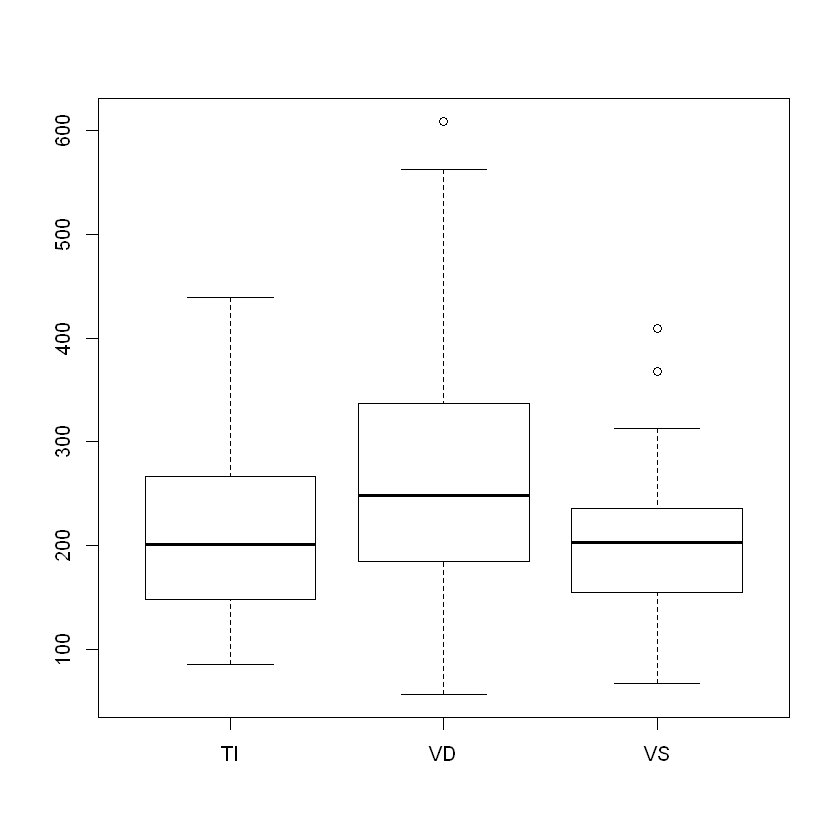

In [21]:
boxplot(d$PFBAC ~ d$KT)

Si vous voulez savoir quelle Z05 se détache particulièrement (en tout cas en valeur absolue !), vous pouvez afficher le n°, nom et nombre de bacheliers de la commune en question en recherchant quelle ligne a la valeur de bacheliers égale au maximum de cette colonne

In [22]:
d[d$PFBAC == max(d$PFBAC), c('KT','Z05', 'NAME', 'PFBAC')]

,KT,Z05,NAME,PFBAC
61,VD,5712,Coppet-Founex,609


Il y a très souvent plusieurs façons d'arriver à ses fins en code (de façon plus ou moins compliquée généralement), ci-dessous deux exemples pour afficher les maxima (en valeurs absolues) du Tessin et du Valais.

In [23]:
d[(d$PFBAC == max(d[d$KT == 'TI', 'PFBAC']) & d$KT == 'TI'), c('KT','Z05', 'NAME', 'PFBAC')]

,KT,Z05,NAME,PFBAC
214,TI,5236,Collina d'Oro,439


In [24]:
d[d$KT == 'VS', ][with(d[d$KT == 'VS', ], order(-PFBAC)), ][1,  c('KT','Z05', 'NAME', 'PFBAC') ]

,KT,Z05,NAME,PFBAC
159,VS,6031,Bagnes,409


## Opt) Sélection de plusieurs cantons, sans avoir d'attribut relatif à ceux-ci

Dans le cas où vous voulez travailler sur l'ensemble des z05 de plusieurs cantons, sans distinction entre ceux-ci, vous pouvez exporter le jeu de données de la façon suivante:

In [25]:
zLatines = subset(mapData$Z05, mapData$KT %in% c(21:26))
rowDataL = match(zLatines, donnees$Z05)
donnees_latines = donnees[rowDataL, ]
write.csv(donnees_latines, file = 'DonneesLatines.csv', fileEncoding = 'UTF-8', row.names = F)